# csvファイルから工程能力指数(Cpk)など適当に計算する

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

from numpy import random
%matplotlib inline

In [2]:
# 環境変数
src_path = "./data.csv"
data_label = "measure" # 計算に使うデータの列名

## 適当なテストデータを作る、すでにある場合は不要

In [3]:
# テストデータの設定
test_average = 3
test_sigma = 0.1
test_num = 100

src = [random.normal(test_average, test_sigma) for x in range(0, test_num)]
test_df = pd.DataFrame({data_label: src})
test_df.to_csv(src_path)
test_df # jupyter上で確認用

,measure
0,2.954538
1,3.014203
2,2.994011
3,3.014217
4,2.980558
5,3.134834
6,2.954026
7,3.160366
8,2.894903
9,3.031144


## ここから本命
### とりあえずデータを読む、ロット分けなどがある場合はいい感じに拡張して
### DataFrameで別カラムの値でフィルタすれば、ロットごとにDataFrameつくって計算できるように

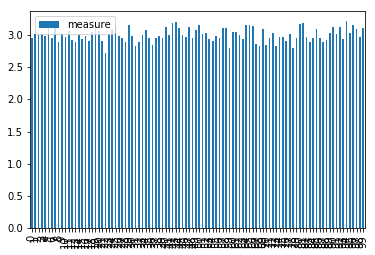

C:\Users\user\Miniconda3\envs\ml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


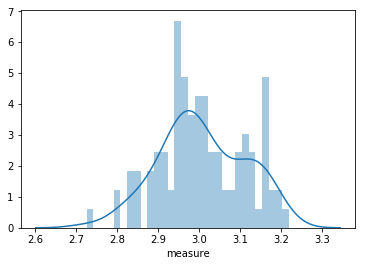

,measure
count,100.000000
mean,3.006436
std,0.104429
min,2.725786
25%,2.946650
50%,2.994029
75%,3.096328
max,3.218957


In [4]:
# データ読み込み
src_df = pd.read_csv(src_path, index_col=0)

# とりあえずデータの中身を眺めよう

#一応散布図とかも見たい
src_df.plot(kind='bar')
plt.show()
sns.distplot(src_df[data_label], bins = 30)
plt.show()

src_df.describe() # 統計情報

In [5]:
# dfからCp, Cpkを計算。今回は観測値が正規分布している前提で、所々の変換は省略

def compute_cpk(df, usl, lsl):
    average = df.mean()
    sigma = df.std()
    
    cp = (usl - lsl) / (6 * sigma)
    cpk = min((usl - average) / (3 * sigma), (average - lsl) / (3 * sigma))
    return (cp, cpk)

# 今回は適当なデータ(test_average=3に対して、2.5~3.5を規格値として算出
(result_cp, result_cpk) = compute_cpk(src_df[data_label], 3.5, 2.5)
print("Cp: {}, Cpk: {}".format(result_cp, result_cpk))

Cp: 1.5959848902643887, Cpk: 1.5754429096055702
